# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
from torchvision import datasets
import torchvision.transforms as transforms 
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import numpy as np

batch_size = 32

valid_size = 0.2 

transform_train = transforms.Compose([transforms.Resize([256,256]),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomVerticalFlip(),                                  
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
transform_test = transforms.Compose([transforms.Resize([256,256]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


train_data = datasets.ImageFolder(root ='/data/landmark_images/train' ,transform = transform_train )
test_data = datasets.ImageFolder(root='/data/landmark_images/test', transform = transform_test)


num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int (np.floor(valid_size * num_train))
train_idx , valid_idx = indices[split:], indices[:split]


train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

loaders_scratch = {'train': None, 'valid': None, 'test': None}


loaders_scratch['train'] = DataLoader(train_data, batch_size=batch_size, sampler = train_sampler)
loaders_scratch['valid'] = DataLoader(train_data, batch_size=batch_size, sampler = valid_sampler)
loaders_scratch['test'] = DataLoader(test_data, batch_size=batch_size)





**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 
I did not use any cropping or stretching, I simply resized the image to be of size [256,256]. The size I pick for my input tensor is [3,256,256].I chose the value of 256 so that there is no issues with downsampling if the CNN becomes deeper.

I used RandomHorizontalFlip and RandomVerticalFlip to augment the dataset as the landmark can be in any corner of the image and thus it is a good idea to look the image through every angle. 


### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

50

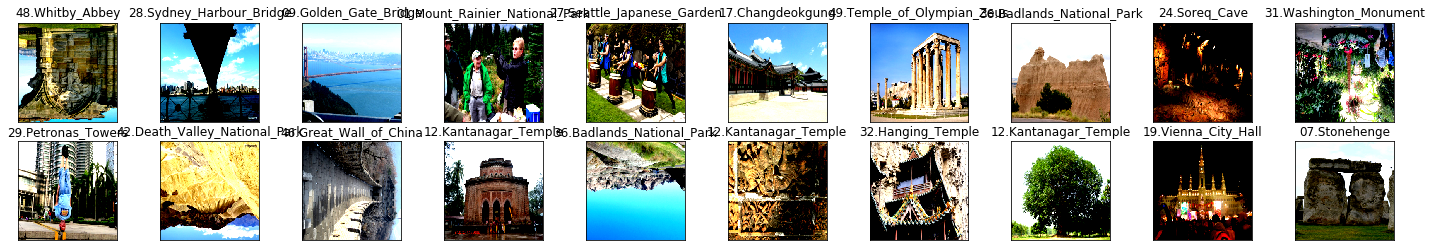

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def imshow(img):
    max = np.max(img)
    min = np.min(img)
    img = img-min/(max - min)
    plt.imshow(np.transpose(img.clip(0,1),(1,2,0)))
    
dataiter = iter(loaders_scratch['train'])
images,labels = dataiter.next()
images = images.numpy()


fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,20/2,idx+1, xticks=[] , yticks=[])
    imshow(images[idx])
    ax.set_title(train_data.classes[labels[idx]])
    
len(train_data.classes)


### Initialize use_cuda variable

In [3]:
# useful variable that tells us whether we should use the GPU
import torch
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [4]:
## TODO: select loss function
import torch.nn as nn
import torch.optim as optim
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
    
    return optimizer
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [5]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        
        self .fc1 = nn.Linear(32 * 64  * 64 , 1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3=nn.Linear(512,50)
        self.dropout=nn.Dropout(p=0.2)
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1,32 * 64  * 64 )
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)       
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [6]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=131072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=50, bias=True)
  (dropout): Dropout(p=0.2)
)

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
I decided to use two convolution layers along with two maxpooling layers and then using three linear layers for the CNN. I decided to use 2 colvolution layers because taking a (256,256) image, after two convolution layers with kernel=(3,3) and padding=1 and two max pooling layers using a kernel=(2,2), both with stride=1 , reduces the dimension of the image to (64,64) and depth of the image 

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [7]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model_scratch.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            #clear the gradients of all optimized variables
            optimizer.zero_grad()
            #forward pass 
            output = model_scratch(data)
            #backward pass 
            loss = criterion_scratch(output,target)
            loss.backward()
            
            #perform the optimization step 
            optimizer.step()
            
            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))


            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            #forward pass
            output = model_scratch(data)
            #compute the loss 
            loss = criterion_scratch(output,target)
            #record the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))

            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model_scratch.state_dict(), save_path)
            valid_loss_min = valid_loss

        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [8]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.normal_(0,y)
        m.bias.data.fill_(0)
    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.888377 	Validation Loss: 3.848355
Validation loss decreased (inf --> 3.848355).  Saving model ...
Epoch: 2 	Training Loss: 3.797108 	Validation Loss: 3.759166
Validation loss decreased (3.848355 --> 3.759166).  Saving model ...
Epoch: 3 	Training Loss: 3.716213 	Validation Loss: 3.669898
Validation loss decreased (3.759166 --> 3.669898).  Saving model ...
Epoch: 4 	Training Loss: 3.622868 	Validation Loss: 3.580877
Validation loss decreased (3.669898 --> 3.580877).  Saving model ...
Epoch: 5 	Training Loss: 3.524600 	Validation Loss: 3.504730
Validation loss decreased (3.580877 --> 3.504730).  Saving model ...
Epoch: 6 	Training Loss: 3.463618 	Validation Loss: 3.488092
Validation loss decreased (3.504730 --> 3.488092).  Saving model ...
Epoch: 7 	Training Loss: 3.390961 	Validation Loss: 3.381837
Validation loss decreased (3.488092 --> 3.381837).  Saving model ...
Epoch: 8 	Training Loss: 3.325728 	Validation Loss: 3.364311
Validation loss decreased (3.38183

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [9]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.904389 	Validation Loss: 3.898180
Validation loss decreased (inf --> 3.898180).  Saving model ...
Epoch: 2 	Training Loss: 3.859814 	Validation Loss: 3.841524
Validation loss decreased (3.898180 --> 3.841524).  Saving model ...
Epoch: 3 	Training Loss: 3.780781 	Validation Loss: 3.750018
Validation loss decreased (3.841524 --> 3.750018).  Saving model ...
Epoch: 4 	Training Loss: 3.712759 	Validation Loss: 3.690460
Validation loss decreased (3.750018 --> 3.690460).  Saving model ...
Epoch: 5 	Training Loss: 3.644416 	Validation Loss: 3.636549
Validation loss decreased (3.690460 --> 3.636549).  Saving model ...
Epoch: 6 	Training Loss: 3.572425 	Validation Loss: 3.551601
Validation loss decreased (3.636549 --> 3.551601).  Saving model ...
Epoch: 7 	Training Loss: 3.495819 	Validation Loss: 3.497941
Validation loss decreased (3.551601 --> 3.497941).  Saving model ...
Epoch: 8 	Training Loss: 3.441136 	Validation Loss: 3.416010
Validation loss decreased (3.49794

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.938108


Test Accuracy: 26% (331/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [11]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

from torchvision import datasets
import torchvision.transforms as transforms 
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import numpy as np

batch_size = 32

valid_size = 0.2 

transform_train = transforms.Compose([transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomVerticalFlip(),                                  
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
transform_test = transforms.Compose([transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


train_data = datasets.ImageFolder(root ='/data/landmark_images/train' ,transform = transform_train )
test_data = datasets.ImageFolder(root='/data/landmark_images/test', transform = transform_test)


num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int (np.floor(valid_size * num_train))
train_idx , valid_idx = indices[split:], indices[:split]


train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

loaders_transfer = {'train': None, 'valid': None, 'test': None}


loaders_transfer['train'] = DataLoader(train_data, batch_size=batch_size, sampler = train_sampler)
loaders_transfer['valid'] = DataLoader(train_data, batch_size=batch_size, sampler = valid_sampler)
loaders_transfer['test'] = DataLoader(test_data, batch_size=batch_size)




### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [12]:
## TODO: select loss function
## TODO: select loss function
import torch.nn as nn
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return an optimizer
    optimizer = torch.optim.SGD(model.classifier.parameters(),lr=0.01)
    
    return optimizer

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
from torchvision import models
model_transfer = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 106078231.15it/s]


In [14]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [15]:
for param in model_transfer.features.parameters():
    param.requires_grad =False

In [16]:
n_inputs = model_transfer.classifier[6].in_features

last_layer = nn.Linear(n_inputs, 50)

model_transfer.classifier[6]=last_layer


In [17]:

if use_cuda:
    model_transfer = model_transfer.cuda()

In [18]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
I choose VGG architecture as my CNN architecture, as it has been proved to be simple and effective architecture on image data. I remove the last layer in tyhe classifier part of VGG to accomadate for the ouput class size for our example

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            #clear the gradients of all optimized variables
            optimizer.zero_grad()
            #forward pass 
            output = model(data)
            #backward pass 
            loss = criterion(output,target)
            loss.backward()
            
            #perform the optimization step 
            optimizer.step()
            
            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))


            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model_transfer.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            #forward pass
            output = model(data)
            #compute the loss 
            loss = criterion(output,target)
            #record the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))

            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model_transfer.state_dict(), save_path)
            valid_loss_min = valid_loss
    return model

In [20]:
num_epochs = 10
# train the model
model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.920468 	Validation Loss: 2.060682
Validation loss decreased (inf --> 2.060682).  Saving model ...
Epoch: 2 	Training Loss: 1.821166 	Validation Loss: 1.627430
Validation loss decreased (2.060682 --> 1.627430).  Saving model ...
Epoch: 3 	Training Loss: 1.553459 	Validation Loss: 1.624910
Validation loss decreased (1.627430 --> 1.624910).  Saving model ...
Epoch: 4 	Training Loss: 1.410749 	Validation Loss: 1.522753
Validation loss decreased (1.624910 --> 1.522753).  Saving model ...
Epoch: 5 	Training Loss: 1.300064 	Validation Loss: 1.465220
Validation loss decreased (1.522753 --> 1.465220).  Saving model ...
Epoch: 6 	Training Loss: 1.213410 	Validation Loss: 1.472901
Epoch: 7 	Training Loss: 1.169117 	Validation Loss: 1.393528
Validation loss decreased (1.465220 --> 1.393528).  Saving model ...
Epoch: 8 	Training Loss: 1.089470 	Validation Loss: 1.356608
Validation loss decreased (1.393528 --> 1.356608).  Saving model ...
Epoch: 9 	Training Loss: 1.032847 

In [21]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.255170


Test Accuracy: 66% (832/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [61]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image = Image.open(img_path)
    transform = transforms.Compose([transforms.RandomResizedCrop(224),                                 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    
    # load model
    input_image = transform(image).unsqueeze(0)
    if use_cuda:
        input_image= input_image.cuda()
    
    model_transfer.eval()
    
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    
    predictions = model_transfer(input_image).unsqueeze(0)
    
    pred_top_k, indices_top_k = torch.topk(predictions,k=k)
    
    indices_top_k = indices_top_k.detach().cpu().numpy().tolist()[0]
    pred_top_k = pred_top_k.detach().cpu().numpy().tolist()[0]
    
    output_landmarks = [train_data.classes[indices] for indices in indices_top_k[0]]
    list_landmarks=[]
    for landmarks in output_landmarks:
        list_landmarks.append(landmarks.split('.')[1])
        
    return list_landmarks 


# test on a sample image
pred_top_5 = predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

In [62]:
pred_top_5

['Sydney_Harbour_Bridge',
 'Forth_Bridge',
 'Pont_du_Gard',
 'Eiffel_Tower',
 'Sydney_Opera_House']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

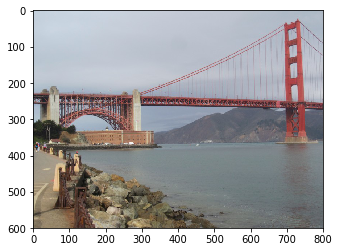

Is this picture of the Sydney_Harbour_Bridge, Golden_Gate_Bridge, Forth_Bridge


In [63]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    ## TODO: display image and display landmark predictions
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()
    print("Is this picture of the " + predicted_landmarks[0] + ", " + predicted_landmarks[1] + ", " + predicted_landmarks[2])
    
# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The model is performing significally good. Three points of improvement could be:
1. Maybe the optimizer can be better optimizer than SGD
2. Maybe we can use a better archtecture than VGG like a ResNet to get a better accuracy
3. Maybe we can add more transformations inorder to augment the data, so that the model can learn better

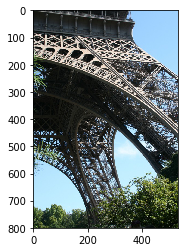

Is this picture of the Eiffel_Tower, Forth_Bridge, Sydney_Harbour_Bridge


In [64]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
suggest_locations('images/test/16.Eiffel_Tower/3828627c8730f160.jpg')


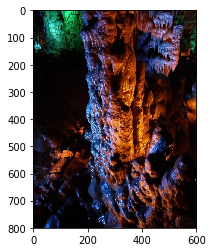

Is this picture of the Soreq_Cave, Externsteine, Great_Barrier_Reef


In [65]:
suggest_locations('images/test/24.Soreq_Cave/18dbbad48a83a742.jpg')

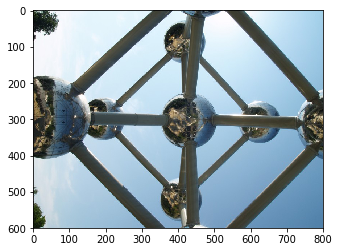

Is this picture of the Atomium, Wroclaws_Dwarves, Death_Valley_National_Park


In [66]:
suggest_locations('images/test/37.Atomium/5ecb74282baee5aa.jpg')

In [ ]:
suggest_locations('images/test/41.Machu_Picchu/4336abf3179202f2.jpg')

In [ ]:
!!jupyter nbconvert *.ipynb